# Lecture 10 - Code Implementation for the Naive Bayes Classifier & Its Discriminant Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import scipy.stats as stats
import pandas as pd

In [2]:
def generateData(mean1, mean2, cov1, cov2, N1, N2):
    # We are generating data from two Gaussians to represent two classes
    # In practice, we would not do this - we would just have data from the problem we are trying to understand
    data_C1 = stats.multivariate_normal(mean1, cov1).rvs(size=N1)
    data_C2 = stats.multivariate_normal(mean2, cov2).rvs(size=N2)
        
    # Entire Training Dataset
    data = np.concatenate((data_C1, data_C2))
    labels = np.concatenate((np.ones(N1),2*np.ones(N2)))
    
    if len(mean1)>1:
        plt.scatter(data[labels==1,0], data[labels==1,1], c='b', alpha=0.5, edgecolors='k')
        plt.scatter(data[labels==2,0], data[labels==2,1], c='r', alpha=0.5, edgecolors='k')
        plt.xlabel('Feature 1'); plt.ylabel('Feature 2');
    else:
        plt.scatter(data[labels==1], np.ones(N1), c='b', alpha=0.5, edgecolors='k')
        plt.scatter(data[labels==2], np.ones(N2), c='r', alpha=0.5, edgecolors='k')
        plt.xlabel('Feature 1');
        
    return data, labels

## Case 1: Univariate Data Likelihood

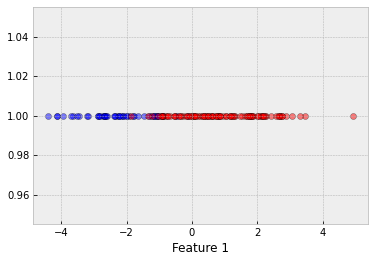

In [3]:
mean1 = [-2]
mean2 = [1]
var1 = [1]
var2 = [2]
N1 = 50 # C1 - blue
N2 = 100 # C2 - red

data, labels = generateData(mean1, mean2, var1, var2, N1, N2)

In [8]:
def drawMAP(data, labels):
    
    #### Estimate parameters (MLE solution)
    # Means
    mu1 = np.mean(data[labels==1]) 
    mu2 = np.mean(data[labels==2])
    
    # Variances
    var1 = np.cov(data[labels==1])
    var2 = np.cov(data[labels==2])
    
    #### Estimate Prior Probabilities - relative frequency
    N = len(data)
    N1 = np.sum(labels==1)
    N2 = N - N1
    p1 = 0.7 #N1/N # prior probability for C1
    p2 = 0.3 #N2/N # prior probability for C2
    
    #### Define data likelihoods 
    G1=stats.norm(loc=mu1,scale=np.sqrt(var1)) # P(x|C1)
    G2=stats.norm(loc=mu2,scale=np.sqrt(var2)) # P(x|C2)
    x=np.linspace(-6,6,1001)
        
    #### Plot the weighted densities
    # these are proportional to the posteriors
    plt.figure(figsize=(10,5))
    plt.plot(x,p1*G1.pdf(x),label='$f_X(x|C_1)P(C_1)$')
    plt.plot(x,p2*G2.pdf(x),label='$f_X(x|C_2)P(C_2)$')
    
    #### Determine the regions where the posterior for deciding C1 
    # and the posterior for deciding C2
    R1=x[np.where(p1*G1.pdf(x)>= p2*G2.pdf(x))]
    R2=x[np.where(p1*G1.pdf(x)< p2*G2.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3,label='Decide C1')
    plt.fill_between(R2,p2*G2.pdf(R2),alpha=0.3,label='Decide C2')
    plt.scatter(data[labels==1], -0.01*np.ones(N1), c='b', alpha=0.5, edgecolors='k')
    plt.scatter(data[labels==2], -0.01*np.ones(N2), c='r', alpha=0.5, edgecolors='k')
    plt.legend()
    
    # Print the MAP threshold
    print('MAP decision threshold to decide C2 is >',round(R2[0],2))

MAP decision threshold to decide C2 is > -0.42


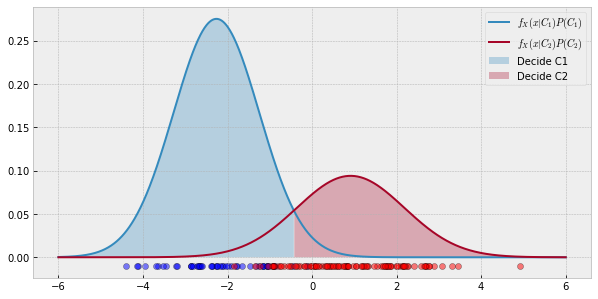

In [9]:
drawMAP(data,labels)

## Case 2: Multivariate Data Likelihood

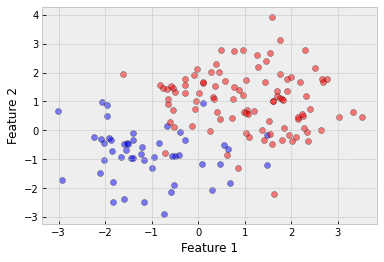

In [10]:
mean1 = [-1, -1]
mean2 = [1, 1]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
N1 = 50
N2 = 100

data, labels = generateData(mean1, mean2, cov1, cov2, N1, N2)

In [11]:
data.shape

(150, 2)

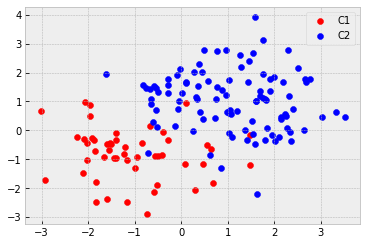

In [12]:
plt.scatter(data[labels==1,0], data[labels==1,1], color='red', label='C1')
plt.scatter(data[labels==2,0], data[labels==2,1], color='blue', label='C2')
plt.legend();

In [13]:
#### Estimate parameters (with MLE solutions)
# Means
mu1 = np.mean(data[labels==1], axis=0)
print('Mean of Class 1: ', mu1)
mu2 = np.mean(data[labels==2], axis=0)
print('Mean of Class 2: ', mu2)

# Covariances - in this example we are showing the case where we estimate the full covariance
cov1 = np.cov(data[labels==1,:].T) # np.cov expects input to be D-by-N
print('Covariance of Class 1: ',cov1)
cov2 = np.cov(data[labels==2, :].T)
print('Covariance of Class 2: ',cov2)

#### Estimate Prior Probabilities - relative frequency
N = N1+N2
p1 = N1/N
print('Probability of  Class 1: ',p1)
p2 = N2/N
print('Probability of  Class 2: ',p2)

Mean of Class 1:  [-1.06430816 -0.81045711]
Mean of Class 2:  [1.06929971 1.04040863]
Covariance of Class 1:  [[ 1.06189105 -0.13615036]
 [-0.13615036  0.79225929]]
Covariance of Class 2:  [[ 1.19700735 -0.12968429]
 [-0.12968429  1.03864653]]
Probability of  Class 1:  0.3333333333333333
Probability of  Class 2:  0.6666666666666666


/scratch/local/45461919/ipykernel_553610/456180230.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/scratch/local/45461919/ipykernel_553610/456180230.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


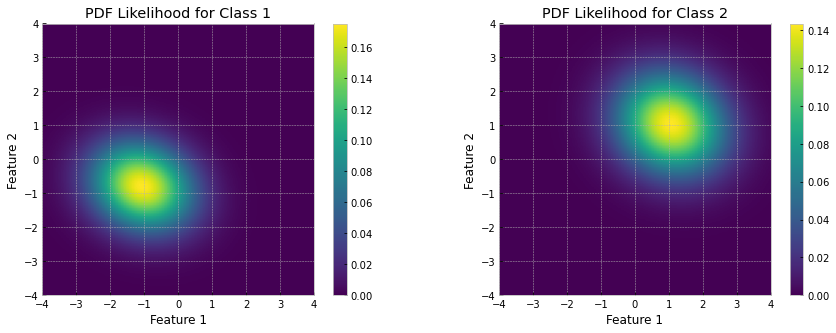

In [14]:
# Compute a grid of values for x and y 
grid = 4
x = np.linspace(-grid, grid, 100)
y = np.linspace(-grid, grid, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0) # grid of values

# Let's plot the probabaility density function (pdf) for each class
y1 = stats.multivariate_normal.pdf(X, mean=mu1, cov=cov1) #P(x|C1) - data likelihood for C1
y2 = stats.multivariate_normal.pdf(X, mean=mu2, cov=cov2) #P(x|C2)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

/scratch/local/45461919/ipykernel_553610/2438022265.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/scratch/local/45461919/ipykernel_553610/2438022265.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


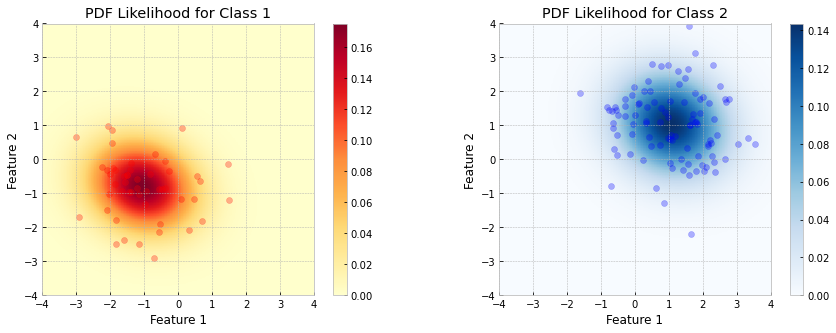

In [15]:
fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(data[labels==1,0], data[labels==1,1], c='r',alpha=0.3)
plt.imshow(y1, extent=[-grid,grid,-grid,grid],cmap='YlOrRd')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.scatter(data[labels==2,0], data[labels==2,1], c='b',alpha=0.3)
plt.imshow(y2, extent=[-grid,grid,-grid,grid], cmap='Blues')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

/scratch/local/45461919/ipykernel_553610/3632351536.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/scratch/local/45461919/ipykernel_553610/3632351536.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


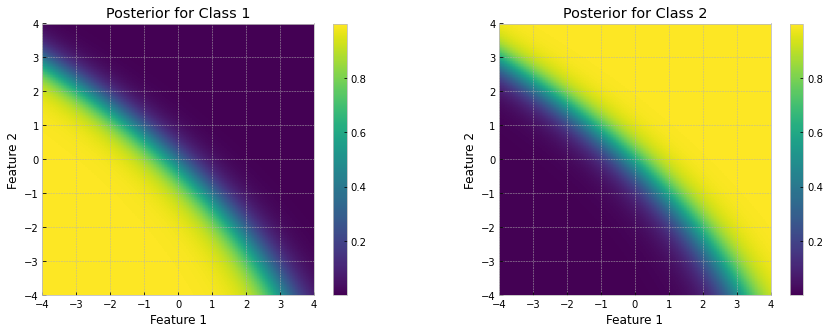

In [16]:
# Let's take a look at the posterior distributions: they represent our classification decision
pos1 = (y1*p1)/(y1*p1+y2*p2) # P(C1|x) - posterior probability
pos2 = (y2*p2)/(y1*p1+y2*p2) # P(C2|x)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(pos1, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(pos2, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 2');

In [ ]:
pos1.shape

/scratch/local/45461919/ipykernel_553610/3412889994.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


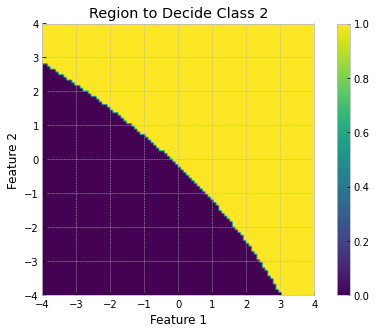

In [17]:
# Look at the decision boundary for deciding Class 2

plt.figure(figsize=(8,5))
plt.imshow(pos2>pos1, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Region to Decide Class 2');